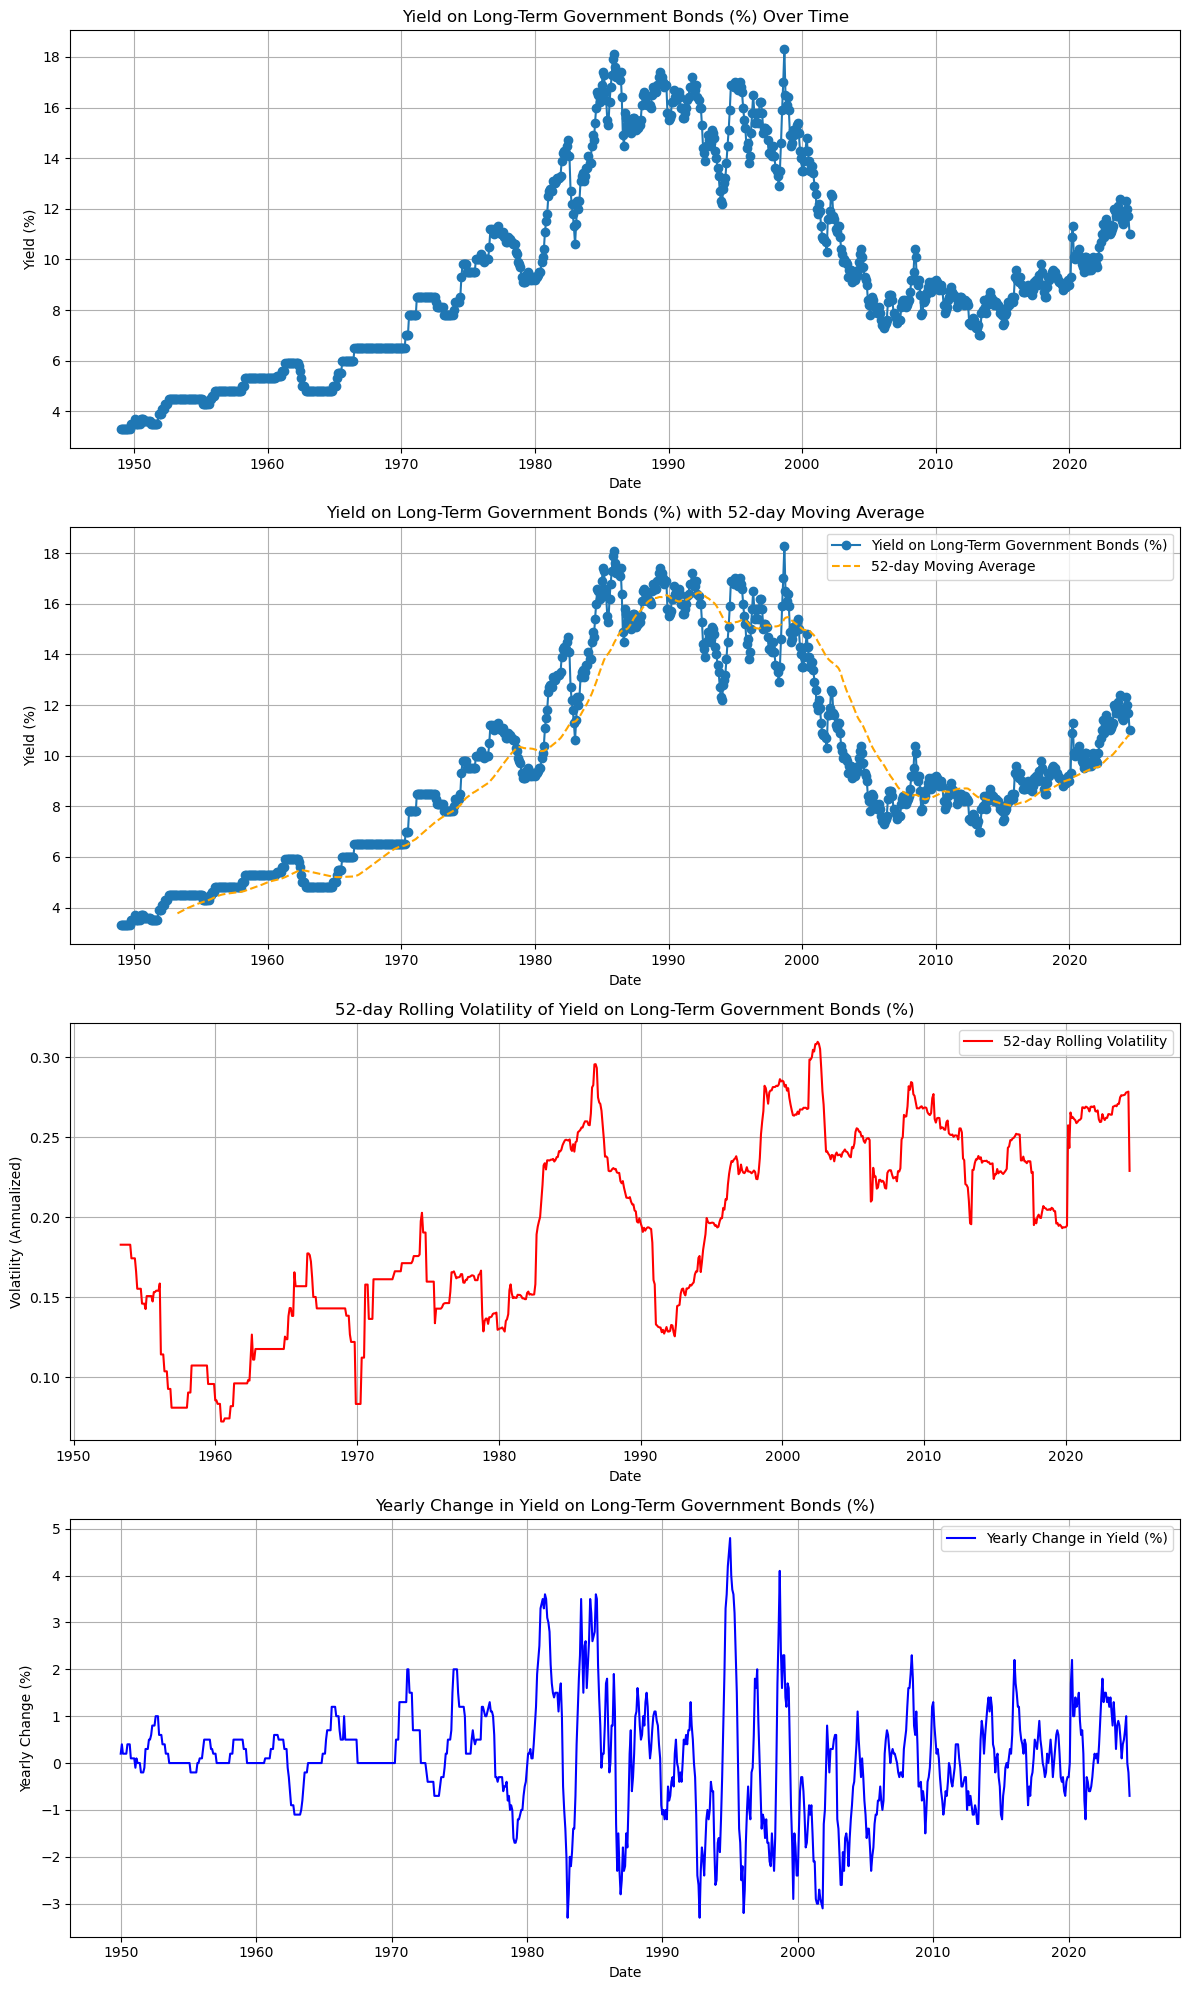

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'MonthlyRelease_Capital_Markets.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to a datetime format for easier analysis
data['Date'] = pd.to_datetime(data['Date'], format='%b, %Y')

# Extract only the columns we need: 'Date' and 'Yield on long-term government bonds (%)'
yield_data = data[['Date', 'Yield on long-term government bonds (%)']]

# Clean any missing data
yield_data = yield_data.dropna()

# Set the 'Date' as the index
yield_data.set_index('Date', inplace=True)

# Sort the data by Date
yield_data = yield_data.sort_index()

# Calculate the 52-day moving average
yield_data['52-day Moving Average'] = yield_data['Yield on long-term government bonds (%)'].rolling(window=52).mean()

# Calculate the daily returns to measure volatility
yield_data['Daily Returns'] = yield_data['Yield on long-term government bonds (%)'].pct_change()

# Calculate the rolling volatility (standard deviation of daily returns) over a 52-day window
yield_data['52-day Volatility'] = yield_data['Daily Returns'].rolling(window=52).std() * (52 ** 0.5)  # Annualized volatility

# Calculate the yearly change in the yield
yield_data['Yearly Change (%)'] = yield_data['Yield on long-term government bonds (%)'].diff(periods=12)

# Define a function to create all the plots in one script
def plot_yield_analysis(yield_data):
    # Create subplots
    fig, axes = plt.subplots(4, 1, figsize=(12, 20))
    
    # Plot the yield on long-term government bonds
    axes[0].plot(yield_data['Yield on long-term government bonds (%)'], marker='o', linestyle='-')
    axes[0].set_title('Yield on Long-Term Government Bonds (%) Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Yield (%)')
    axes[0].grid(True)
    
    # Plot the yield with the 52-day moving average
    axes[1].plot(yield_data['Yield on long-term government bonds (%)'], marker='o', linestyle='-', label='Yield on Long-Term Government Bonds (%)')
    axes[1].plot(yield_data['52-day Moving Average'], color='orange', linestyle='--', label='52-day Moving Average')
    axes[1].set_title('Yield on Long-Term Government Bonds (%) with 52-day Moving Average')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Yield (%)')
    axes[1].legend()
    axes[1].grid(True)
    
    # Plot the 52-day rolling volatility
    axes[2].plot(yield_data['52-day Volatility'], color='red', linestyle='-', label='52-day Rolling Volatility')
    axes[2].set_title('52-day Rolling Volatility of Yield on Long-Term Government Bonds (%)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Volatility (Annualized)')
    axes[2].legend()
    axes[2].grid(True)
    
    # Plot the yearly change in yield
    axes[3].plot(yield_data['Yearly Change (%)'], color='blue', linestyle='-', label='Yearly Change in Yield (%)')
    axes[3].set_title('Yearly Change in Yield on Long-Term Government Bonds (%)')
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('Yearly Change (%)')
    axes[3].legend()
    axes[3].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call the function to generate the plots
plot_yield_analysis(yield_data)
